In [1]:
%%html
<link rel="stylesheet" type="text/css" href="css/rise.css" />

# Probability distributions of random variables

- Normal distribution
- Central Limit Theorem
- Exponential distribution
- Poisson distribution
- Binomial distribution

In [2]:
import numpy as np

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use("bmh")
plt.rcParams["axes.labelsize"] = 18
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 12

[SciPy](https://scipy.org/)

[scipy.stats](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) 

```
conda install scipy
```

In [3]:
import scipy.stats as st

# Probability distributions of random variables

- *Normal distribution*
- Central Limit Theorem
- Exponential distribution
- Poisson distribution
- Binomial distribution

### Learning goals - *Normal distribution*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to use *scipy.stats* to work with *normal distributions*.</div> | `st.norm` |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to get a continuous distribution's *probability density function* and plot it.</div> | `st.norm.pdf(x, mu, sd)` |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to get a continuous distribution's *cummulative density function*.</div> | `st.norm.cdf(x, mu, sd)` |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to get a continuous distribution's *survival function*.</div> | `st.norm.sf(x, mu, sd)` |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to get the point corresponding to a given fraction of the distribution.</div> | `st.norm.ppf(p, mu, sd)` |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to plot a histogram of data overlaid with a descriptive probability density function.</div> | `plt.hist(data, density=True)` |

### Normal distribution example

Under basal conditions the resting membrane voltage of a neuron fluctuates around -70 mV with a variance of 10 mV. You want to model the neuron's resting membrane voltage.

- In this case the **random variable** is the neuron's resting **membrane voltage**.
- You could model the neuron's resting membrane voltage using a **normal distribution** because the data represent random fluctuations about a central mean.

Normal distribution
- mean $\mu$ = -70 mV 
- standard deviation $\sigma$ = $\sqrt{10}$ mV

In [4]:
# These parameters define a normal distribution
# that you will use to model the neuron's resting membrane voltage

mu = -70           # mean resting membrane voltage (mV)
sd = np.sqrt(10)   # standard deviation about the mean (mV)

What is the probability density of observing a resting membrane voltage of -75 mV?

In [5]:
st.norm.pdf(-75, mu, sd)

0.03614447853363626

What is the probability density of observing a resting membrane voltage of -75 or -69 mV?

In [6]:
st.norm.pdf([-75, -69], mu, sd)

array([0.03614448, 0.12000389])

Plot the entire *pdf* between -85 and -55 mV.

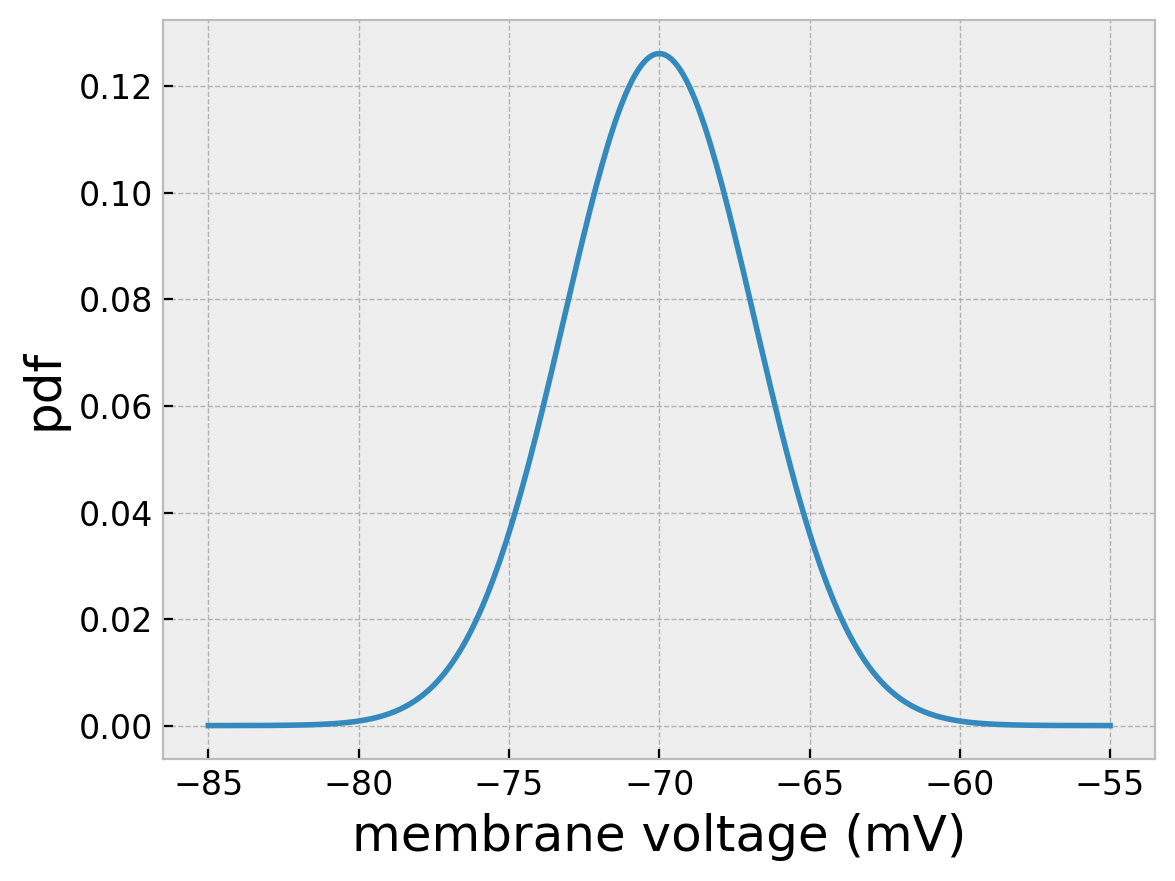

In [7]:
# array of membrane voltages from -85 to -55 mV
mV = np.linspace(-85, -55, 301)

# probability density for each membrane voltage in mV
pdf = st.norm.pdf(mV, mu, sd)

plt.plot(mV, pdf)
plt.xlabel('membrane voltage (mV)')
plt.ylabel('pdf');

What is the probability of observing a resting membrane voltage <= -70 mV?

In [8]:
# cummulative density function (cdf)
st.norm.cdf(-70, mu, sd)

0.5

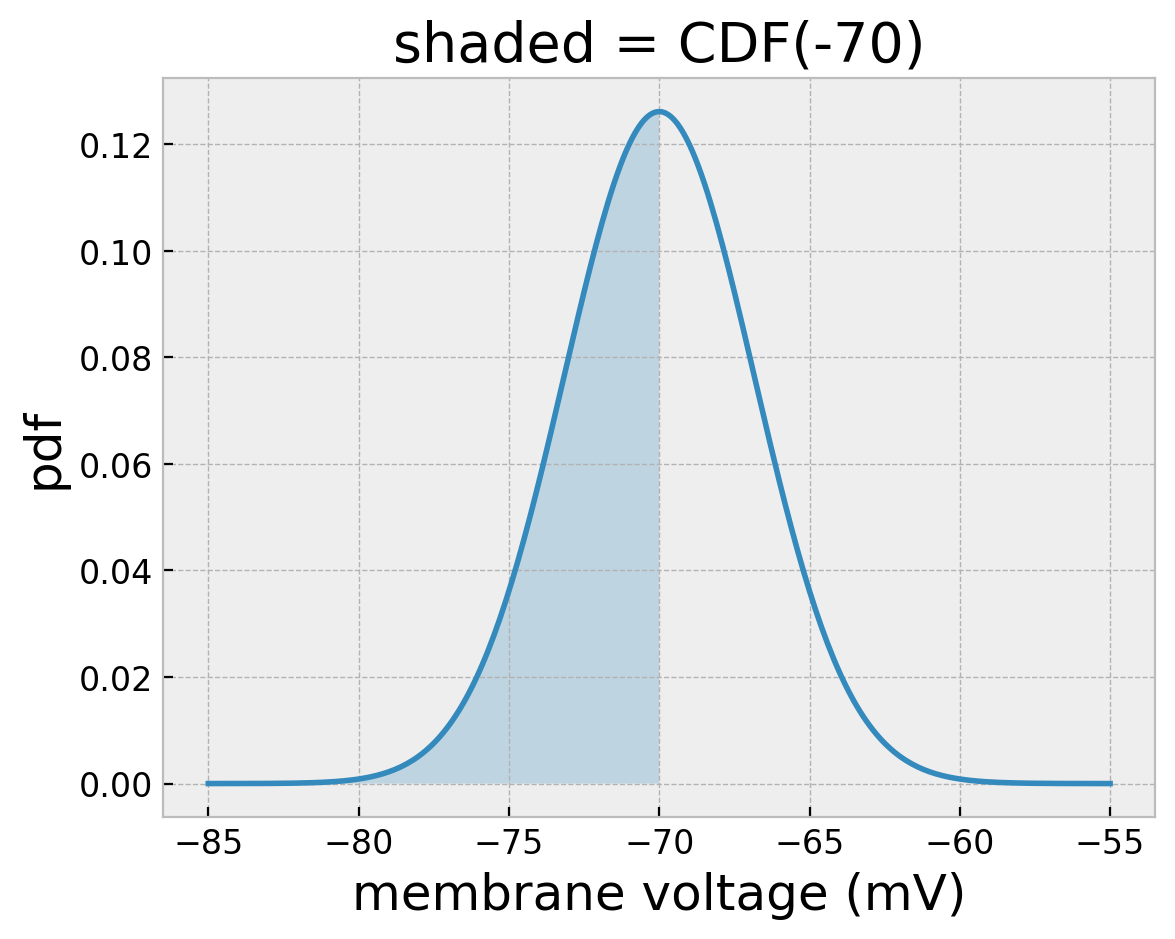

In [9]:
plt.plot(mV, pdf)
mask = (mV <= -70)
plt.fill_between(mV[mask], np.zeros(mV[mask].shape), pdf[mask], alpha=0.25)
plt.xlabel('membrane voltage (mV)')
plt.ylabel('pdf')
plt.title('shaded = CDF(-70)');

What is the probability of observing a resting membrane voltage > -70 mV?

In [10]:
# survival function (sf)
st.norm.sf(-70, mu, sd)

0.5

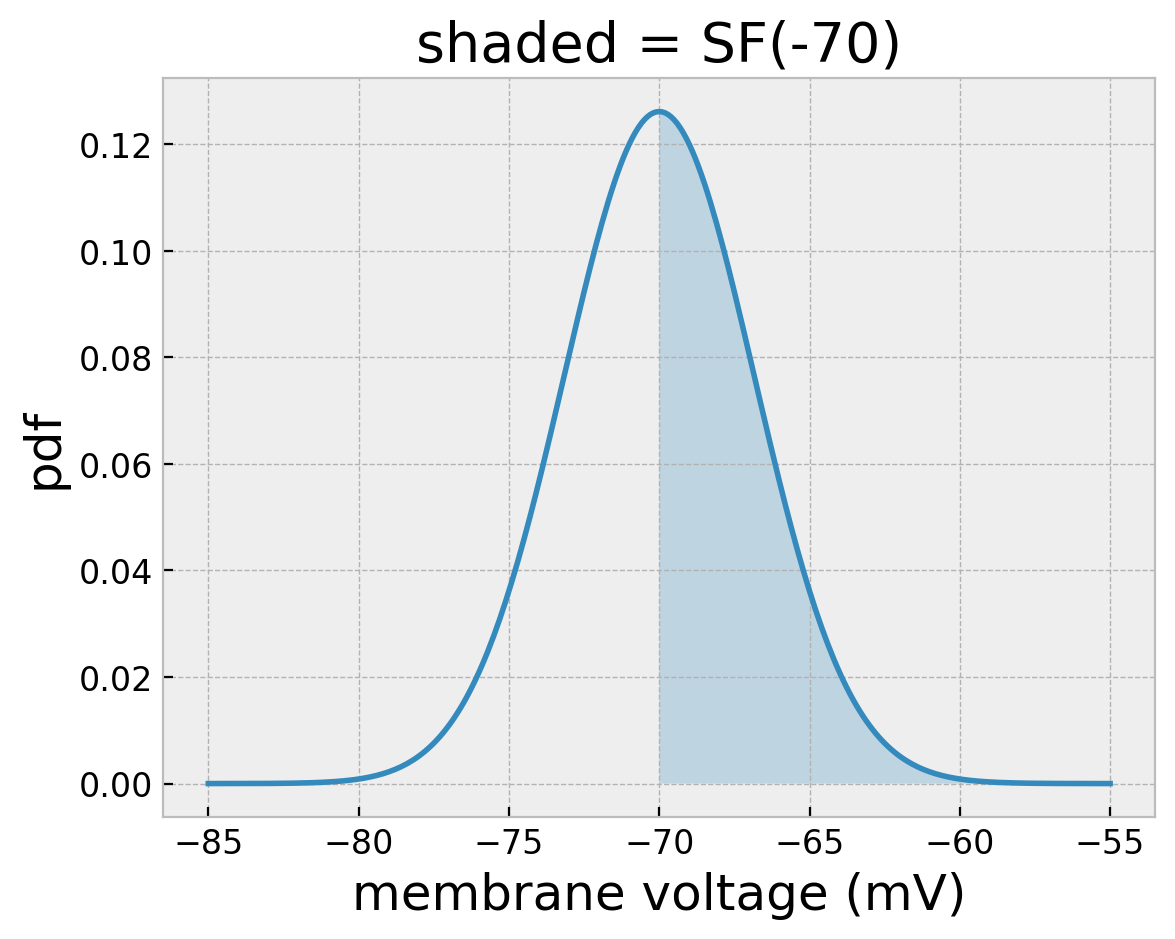

In [11]:
plt.plot(mV, pdf)
mask = (mV >= -70)
plt.fill_between(mV[mask], np.zeros(mV[mask].shape), pdf[mask], alpha=0.25)
plt.xlabel('membrane voltage (mV)')
plt.ylabel('pdf')
plt.title('shaded = SF(-70)');

What voltage do we expect 25% of the observations to be equal to or less than?

In [12]:
# percent point funciton (ppf)
st.norm.ppf(0.25, mu, sd)

-72.13292386905762

In [13]:
V25 = st.norm.ppf(0.25, mu, sd)

st.norm.cdf(V25, mu, sd)

0.25

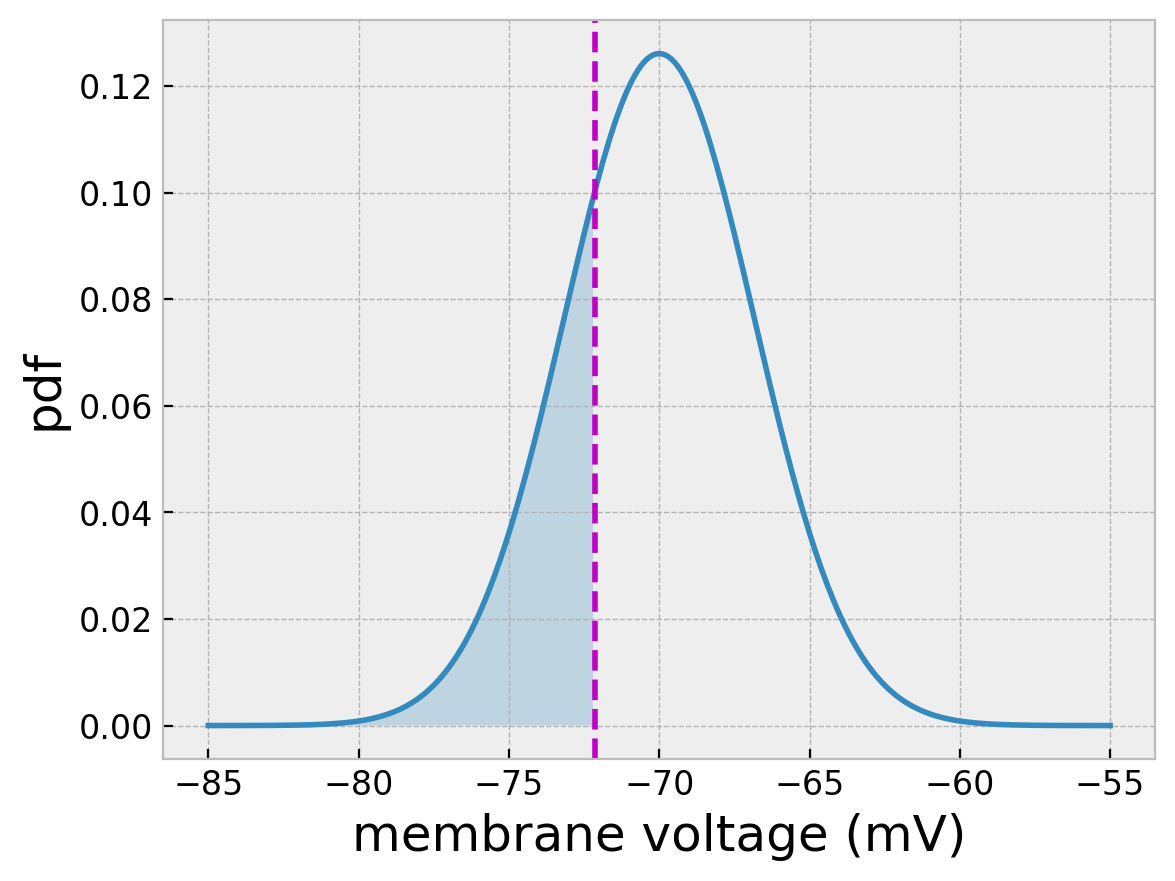

In [14]:
plt.plot(mV, pdf)
plt.axvline(V25, ls='--', color='m')
mask = (mV <= V25)
plt.fill_between(mV[mask], np.zeros(mV[mask].shape), pdf[mask], alpha=0.25)
plt.xlabel('membrane voltage (mV)')
plt.ylabel('pdf');

What voltage range includes the central 95% of expected observations?

In [15]:
# first 2.5% and 97.5% of distribution
low, high = st.norm.ppf([0.025, 0.975], mu, sd)

print(f"95% of membrane voltages are expected to fall within {low :.1f} mV and {high :.1f} mV.")

95% of membrane voltages are expected to fall within -76.2 mV and -63.8 mV.


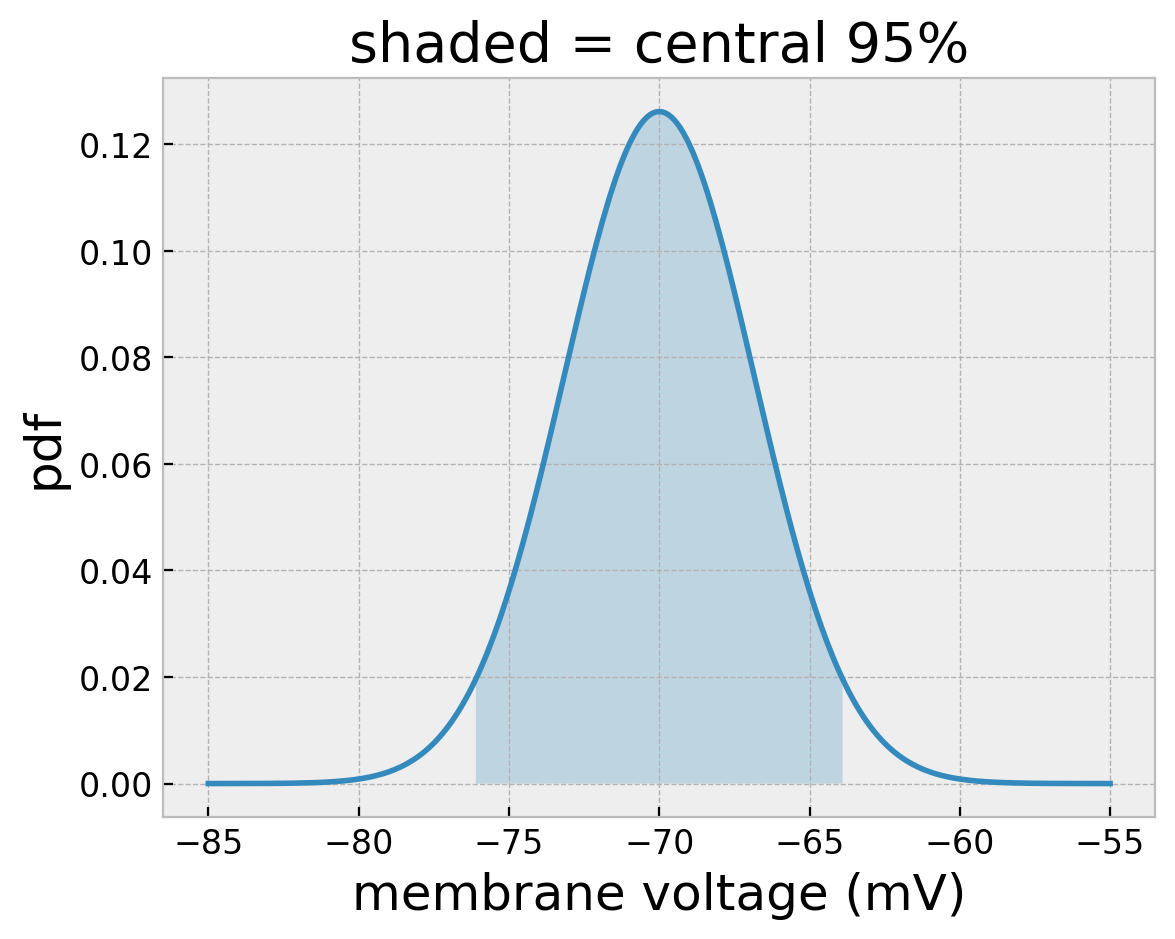

In [16]:
plt.plot(mV, pdf)
mask = (mV >= low) & (mV <= high)
plt.fill_between(mV[mask], np.zeros(mV[mask].shape), pdf[mask], alpha=0.25)
plt.xlabel('membrane voltage (mV)')
plt.ylabel('pdf')
plt.title('shaded = central 95%');

You can draw random sample values from your distribution.

In [17]:
rand_samples = st.norm.rvs(mu, sd, size=5)
rand_samples

array([-72.64910977, -73.3291033 , -72.66643416, -71.87280554,
       -70.65334075])

In [18]:
rand_samples = st.norm.rvs(mu, sd, size=[2,3])
rand_samples

array([[-70.93578401, -72.72644304, -68.73097155],
       [-70.4190829 , -69.73587713, -62.00721181]])

Consider a simulated data sample for measurements of this neuron's resting membrane voltage.

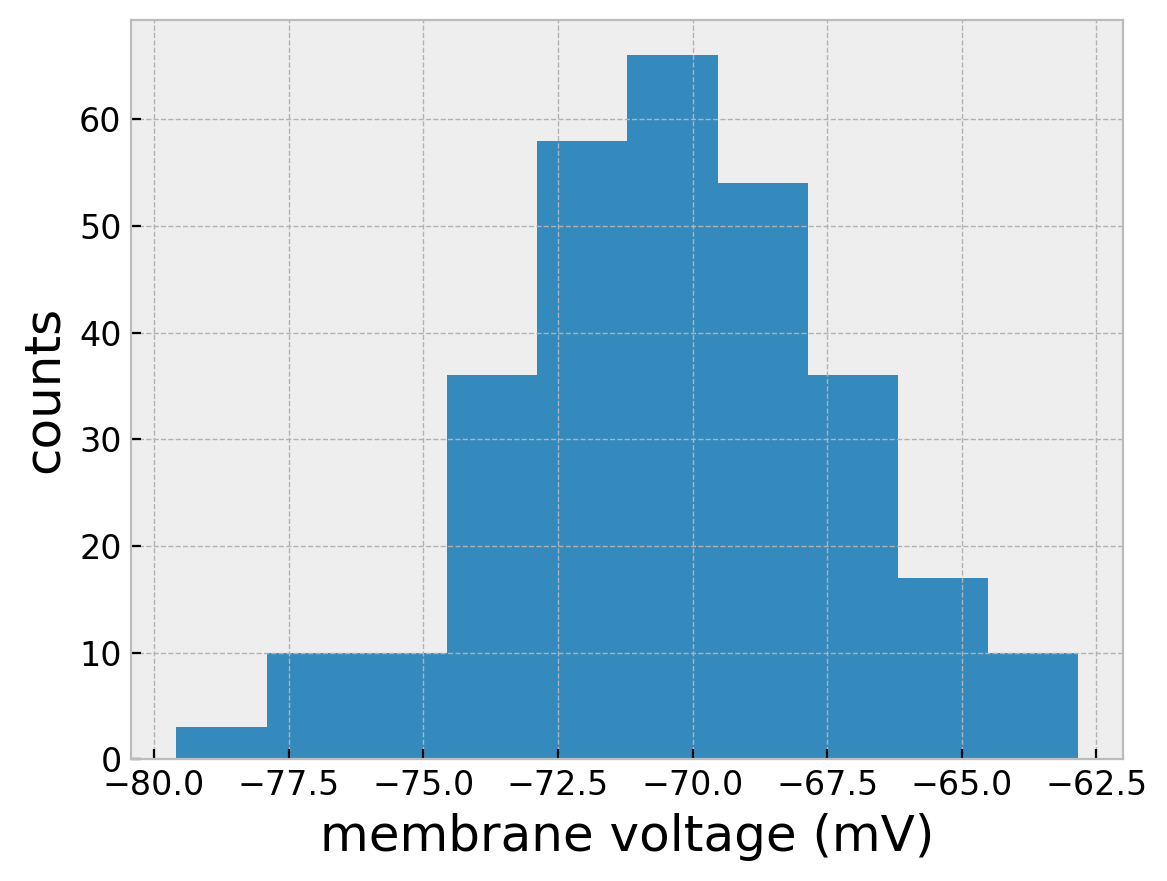

In [19]:
# simulated data for this neuron's resting membrane voltage
data = st.norm.rvs(mu, sd, size=300)

plt.hist(data)
plt.xlabel('membrane voltage (mV)')
plt.ylabel('counts');

Overlaying a PDF on a data histogram **does not make sense** as the units don't match *(counts vs. probability density)*.

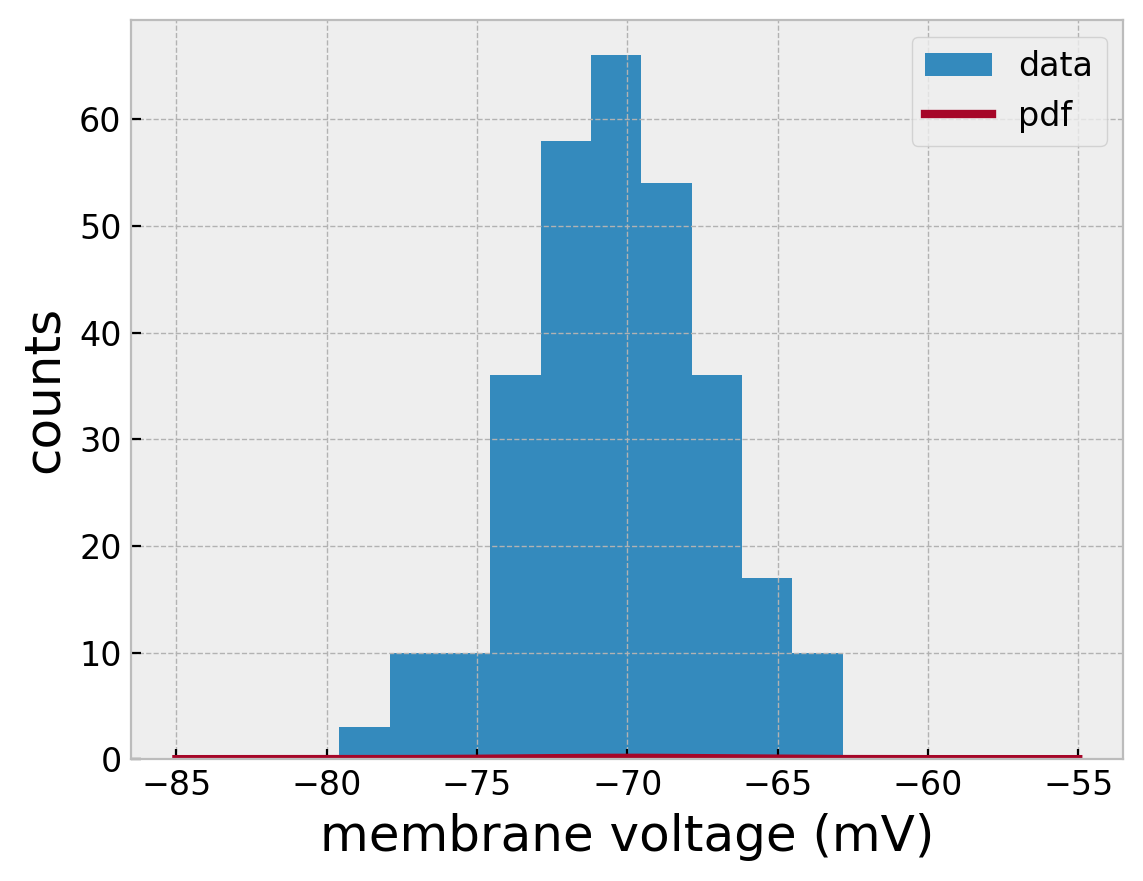

In [20]:
plt.hist(data, label='data')
plt.plot(mV, pdf, lw=3, label='pdf')
plt.xlabel('membrane voltage (mV)')
plt.ylabel('counts')
plt.legend();

The counts histogram must be scaled so that it has **unit area** if you want to directly compare it with a probability distribution.

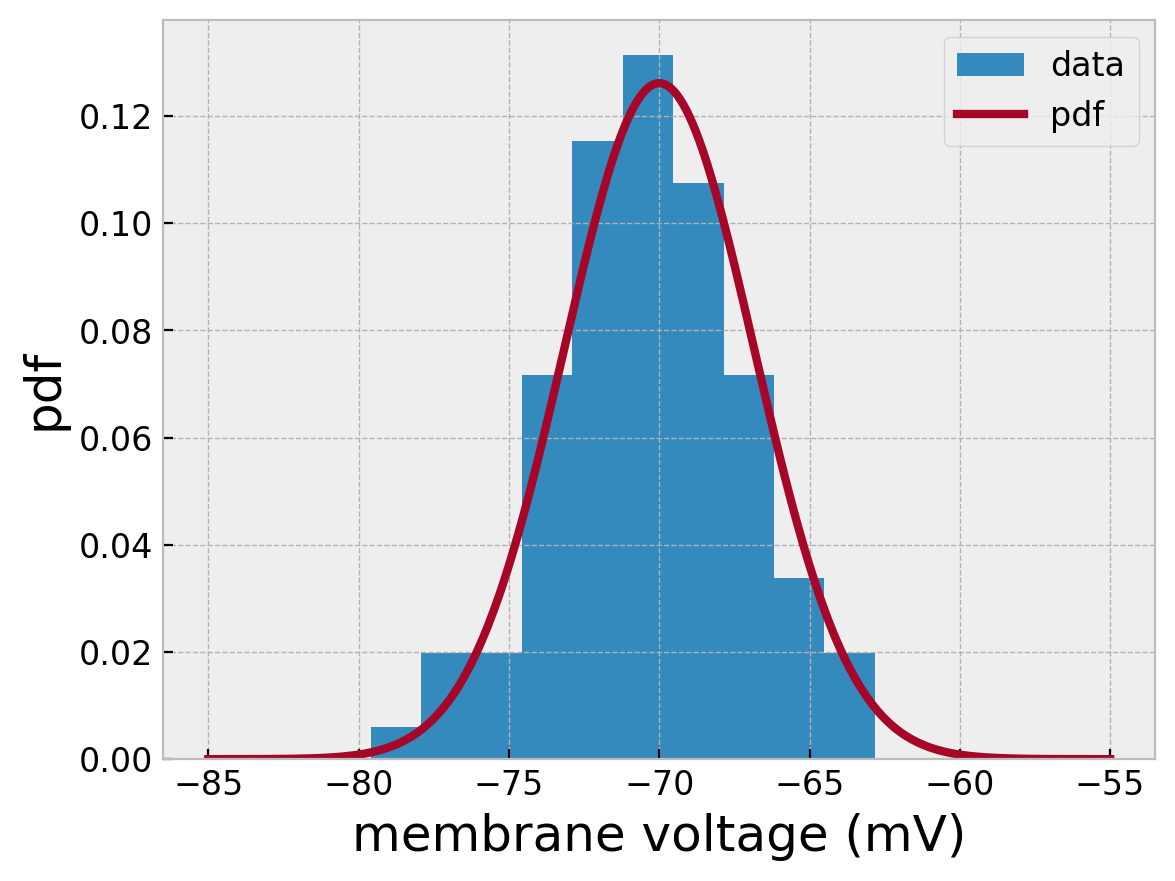

In [21]:
plt.hist(data, label='data', density=True)
plt.plot(mV, pdf, lw=3, label='pdf')
plt.xlabel('membrane voltage (mV)')
plt.ylabel('pdf')
plt.legend();

Note that changing your histograms binning **DOES NOT CHANGE THE UNDERLYING DATA OR THE PDF**, just how you view it.

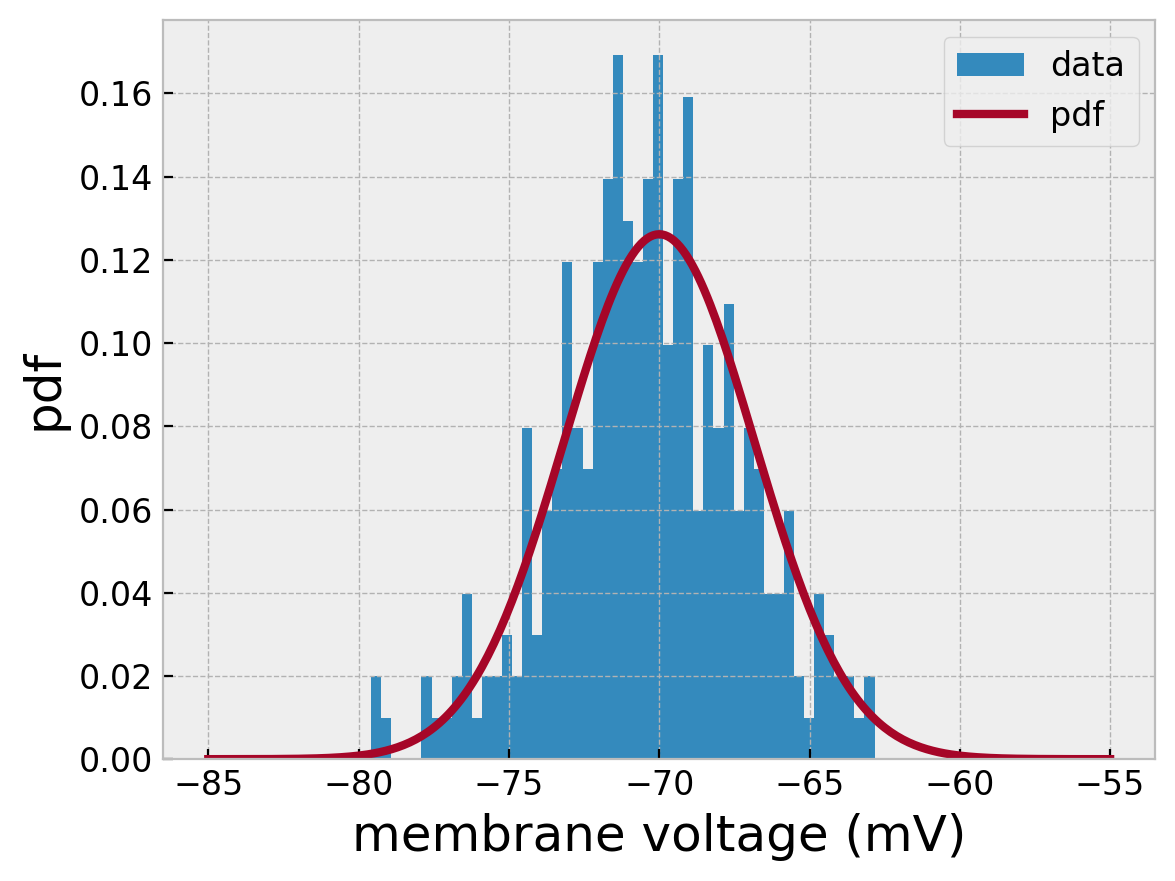

In [22]:
plt.hist(data, 50, label='data', density=True)
plt.plot(mV, pdf, lw=3, label='pdf')
plt.xlabel('membrane voltage (mV)')
plt.ylabel('pdf')
plt.legend();

### Learning goals - *Normal distribution*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to use *scipy.stats* to work with *normal distributions*.</div> | `st.norm` |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to get a continuous distribution's *probability density function* and plot it.</div> | `st.norm.pdf(x, mu, sd)` |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to get a continuous distribution's *cummulative density function*.</div> | `st.norm.cdf(x, mu, sd)` |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to get a continuous distribution's *survival function*.</div> | `st.norm.sf(x, mu, sd)` |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to get the point corresponding to a given fraction of the distribution.</div> | `st.norm.ppf(p, mu, sd)` |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to plot a histogram of data overlaid with a descriptive probability density function.</div> | `plt.hist(data, density=True)` |

# Probability distributions of random variables

- Normal distribution
- *Central Limit Theorem*
- Exponential distribution
- Poisson distribution
- Binomial distribution

### Learning goals - *Central Limit Theorem*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to draw random samples from a distribution.</div> | `st.norm.rvs` |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will appreciate the difference between a population/model distribution and a sample distribution.</div> | |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will see an example of the *Central Limit Theorem*.</div> | |

Consider a **data sample** of $N = 30$ measurements for the neuron's resting membrane voltage.

In [23]:
N = 30  # sample size

# simulated data
rand_samples = st.norm.rvs(mu, sd, size=N)

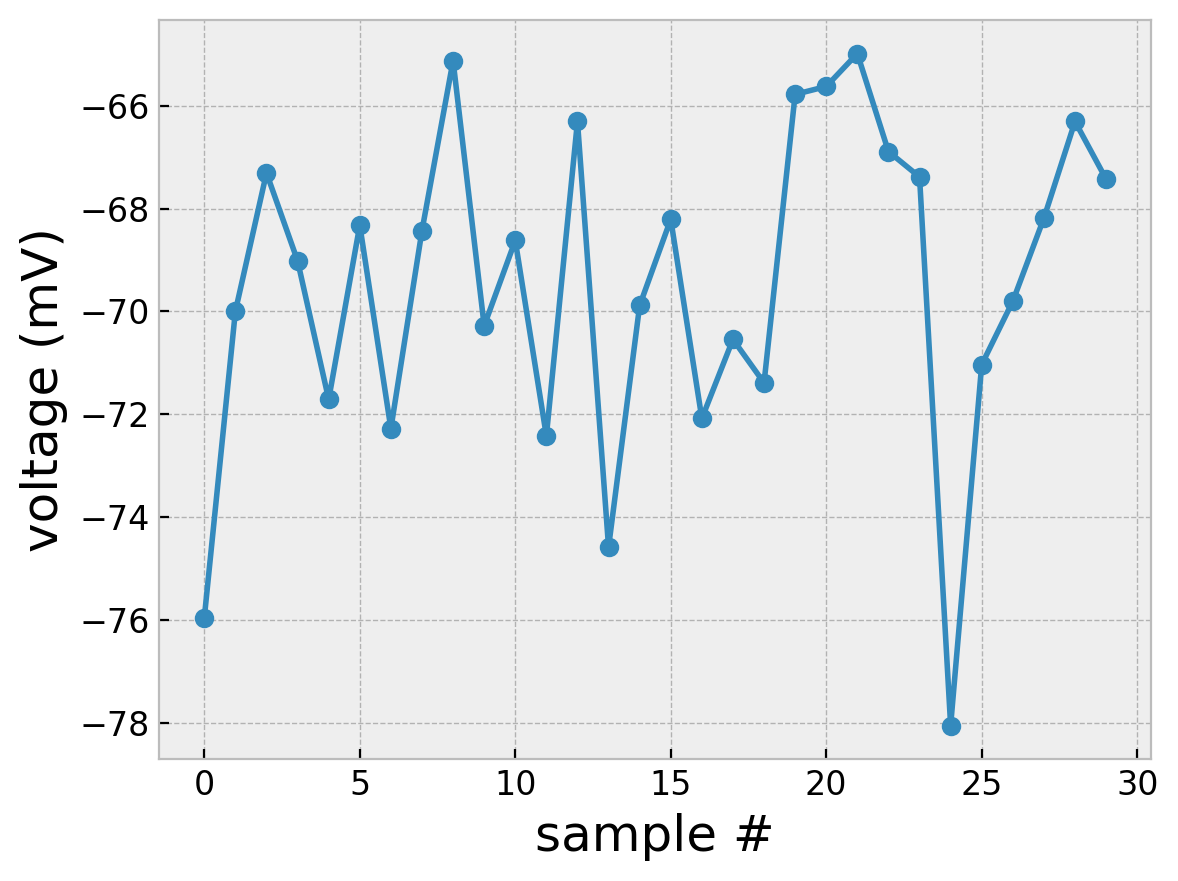

In [24]:
plt.plot(rand_samples, 'o-')
plt.xlabel('sample #')
plt.ylabel('voltage (mV)');

Note that your **sample data** *mean* and *variance* are *NOT exactly the same* as the **population distribution** from which the random samples were drawn.

In [25]:
# simulated data statistics
rand_samples.mean(), rand_samples.var()

(-69.46549347373431, 9.762075175360339)

What if you collected 10 such samples?

In [26]:
for i in range(10):
    rand_samples = st.norm.rvs(mu, sd, size=N)
    print(rand_samples.mean(), rand_samples.var())

-69.60902557030644 8.592761900000433
-69.79322422325836 11.060291948182929
-70.54249168339733 15.380625509573893
-69.73677999449178 9.076727889310032
-69.94816385565876 8.8294684200824
-68.31421263958688 9.141843644265114
-70.50716504027747 10.078321961458482
-70.47078394902245 7.031502401089854
-70.69273787031462 8.047240575097923
-69.75704394324242 11.304905132973657


How about 100 samples, each of size $N = 30$.

In [27]:
# Each column is a sample of size N
rand_samples = st.norm.rvs(mu, sd, size=[N, 100])

Compute the mean of each sample.

In [28]:
rand_sample_means = rand_samples.mean(axis=0)

Plot the distribution of **sample means**.

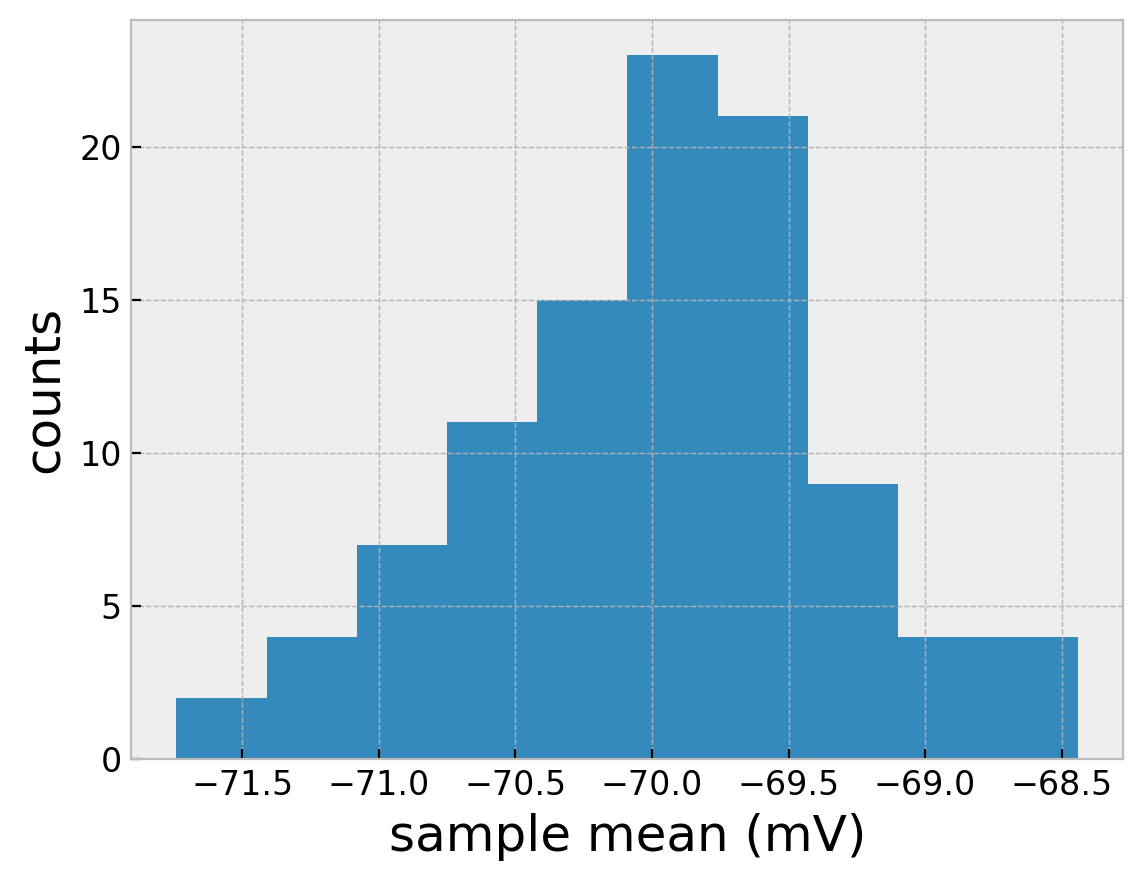

In [29]:
plt.hist(rand_sample_means)
plt.xlabel('sample mean (mV)')
plt.ylabel('counts');

Compare the distribution of **sample means** to the distribution of *resting membrane voltages*.

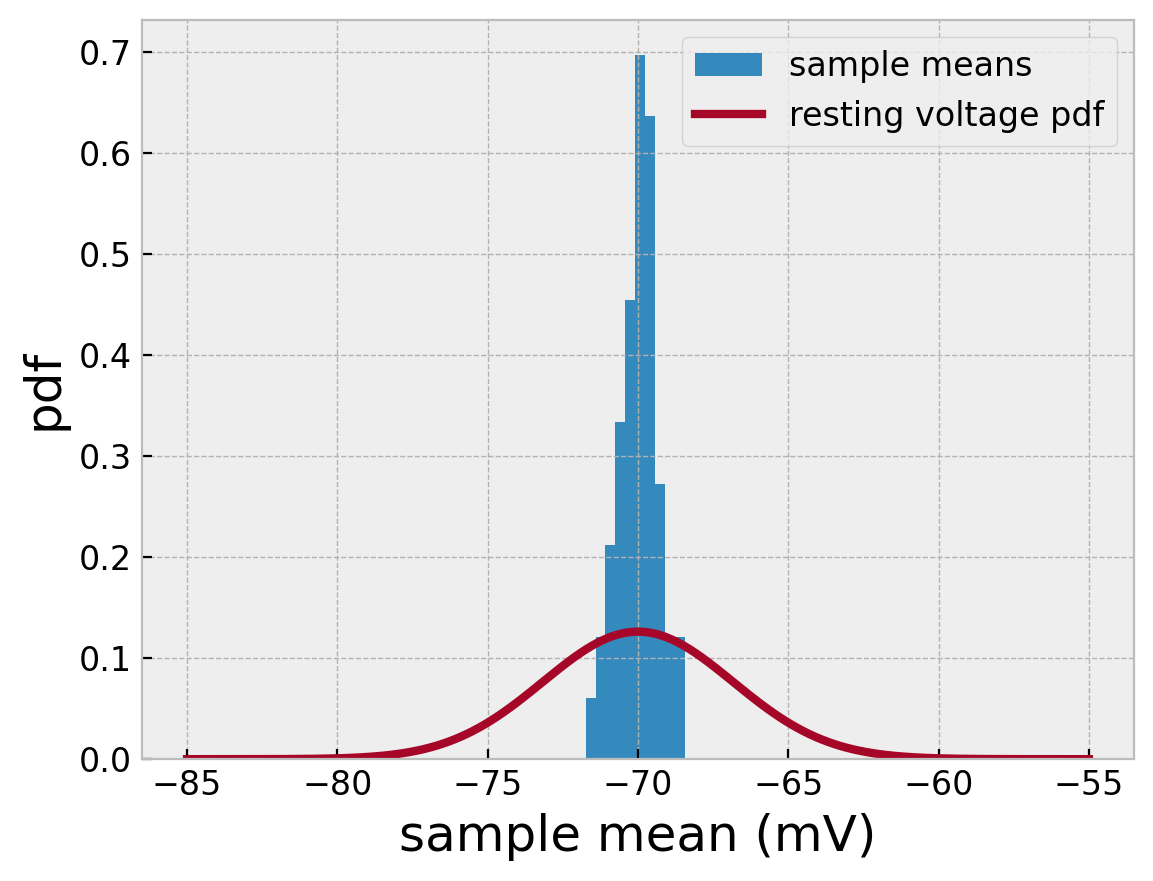

In [30]:
plt.hist(rand_sample_means, label='sample means', density=True)
plt.plot(mV, pdf, lw=3, label='resting voltage pdf')
plt.xlabel('sample mean (mV)')
plt.ylabel('pdf')
plt.legend();

By the **Central Limit Theorem (CLT)** you would expect the distribution of sample means to be normal with mean approaching the mean resting voltage and standard deviation equal the resting voltage standard deviation divided by the square root of the number of observations in each sample.

In [31]:
# PDF for sample means predicted by the Central Limit Theorem
clt_pdf = st.norm.pdf(mV, mu, sd / np.sqrt(N))

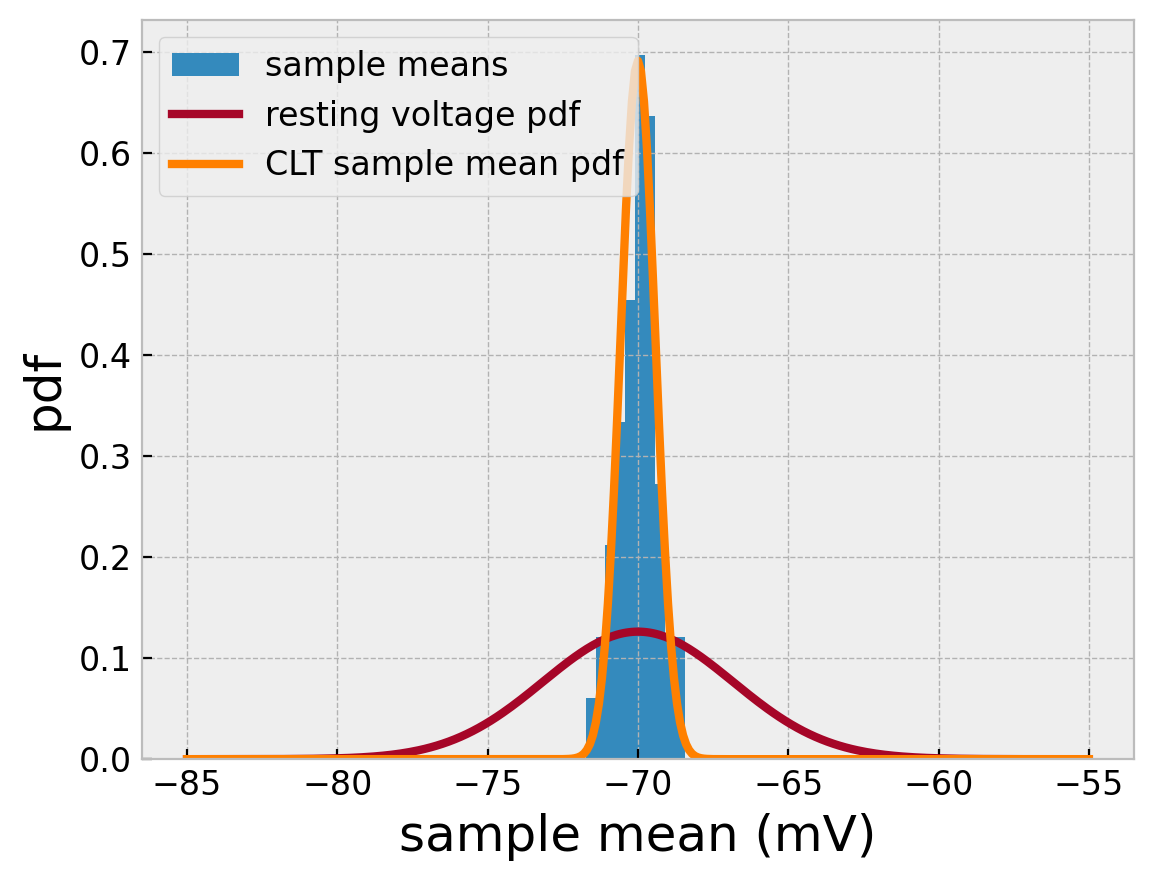

In [32]:
plt.hist(rand_sample_means, label='sample means', density=True)
plt.plot(mV, pdf, lw=3, label='resting voltage pdf')
plt.plot(mV, clt_pdf, lw=3, c=[1,0.5,0], label='CLT sample mean pdf')
plt.xlabel('sample mean (mV)')
plt.ylabel('pdf')
plt.legend();

### Learning goals - *Central Limit Theorem*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to draw random samples from a distribution.</div> | `st.norm.rvs` |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will appreciate the difference between a population/model distribution and a sample distribution.</div> | |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will see an example of the *Central Limit Theorem*.</div> | |

# Probability distributions of random variables

- Normal distribution
- Central Limit Theorem
- *Exponential distribution*
- Poisson distribution
- Binomial distribution

### Learning goals - *Exponential distribution*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to use *scipy.stats* to work with *exponential distributions*.</div> | `st.expon` |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will understand that an *exponential distribution* is completely defined by its mean.</div> | rate = 1 / mean |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will appreciate that the *Central Limit Theorem* holds even for non-normal distributions.</div> | |

### Exponential distribution example

A neuron spikes 1.5 times per second on average. You want to know the probability that less than 0.5 seconds will separate a pair of spikes.

- In this case the **random variable** is the **inter-spike interval time**.
- You could model the inter-spike intervals using an **exponential distribution** because the data represent random fluctuations in the time between events occuring at an average rate.

Exponential distribution
- rate $\lambda$ = 1.5 spikes/sec

In [33]:
rate = 1.5  # (/s)

The mean of an exponential distribution is just the inverse of the rate.
- mean interval $\mu = 1 / \lambda$

In [34]:
mu = 1 / rate

Plot the probability density function of interspike intervals from zero to five seconds with a resolution of 0.01 seconds.

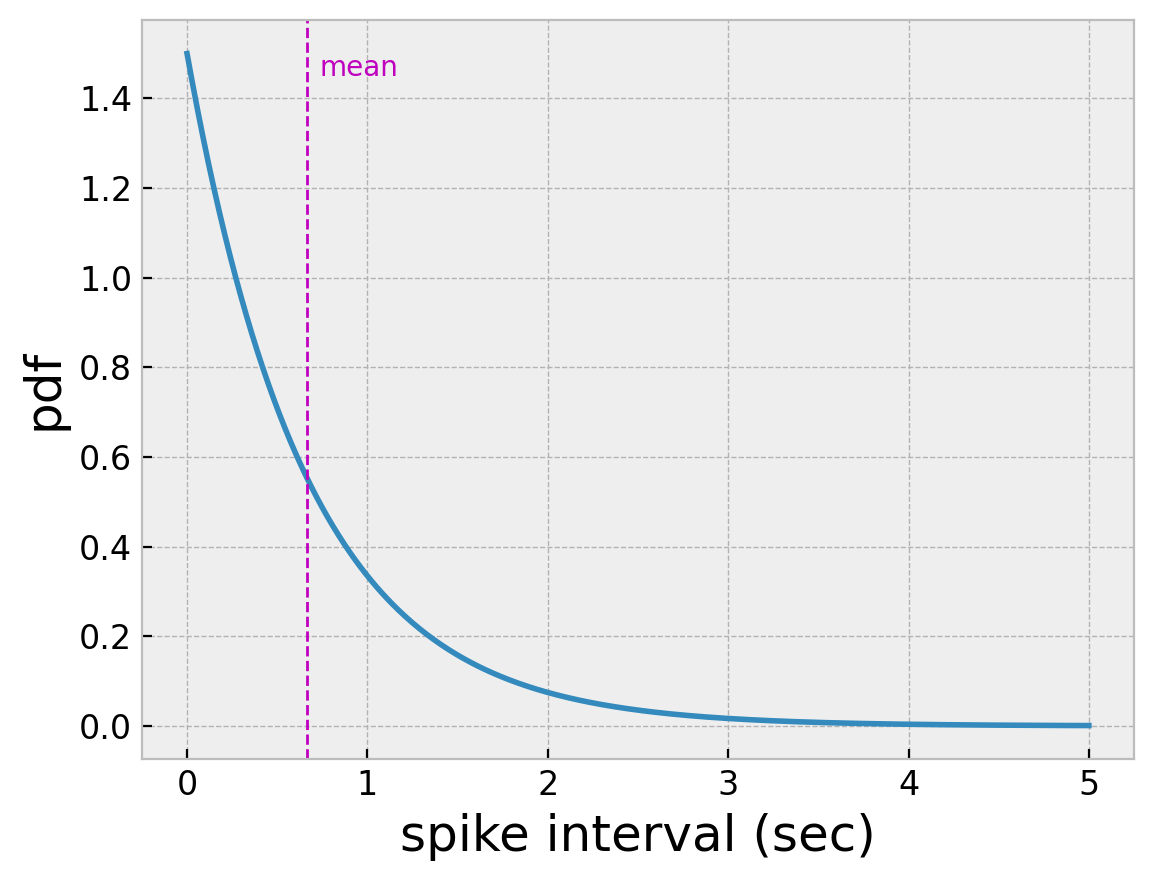

In [35]:
# spike intervals from 0-5 seconds at 0.01 sec resolution
intervals = np.linspace(0, 5, 501)

# exponential pdf for spike intervals
pdf = st.expon.pdf(intervals, 0, mu)

plt.plot(intervals, pdf)
plt.axvline(mu, ls='--', lw=1, color='m')
plt.text(1.1 * mu, 1.45, 'mean', color='m')
plt.xlabel('spike interval (sec)')
plt.ylabel('pdf');

What is the probability that an interval will be between 1 and 2 seconds?

In [36]:
prob1to2 = st.expon.cdf(2, 0, mu) - st.expon.cdf(1, 0, mu)

print(f"Probability of a spike interval being between 1 and 2 seconds is {prob1to2:.2f}")

Probability of a spike interval being between 1 and 2 seconds is 0.17


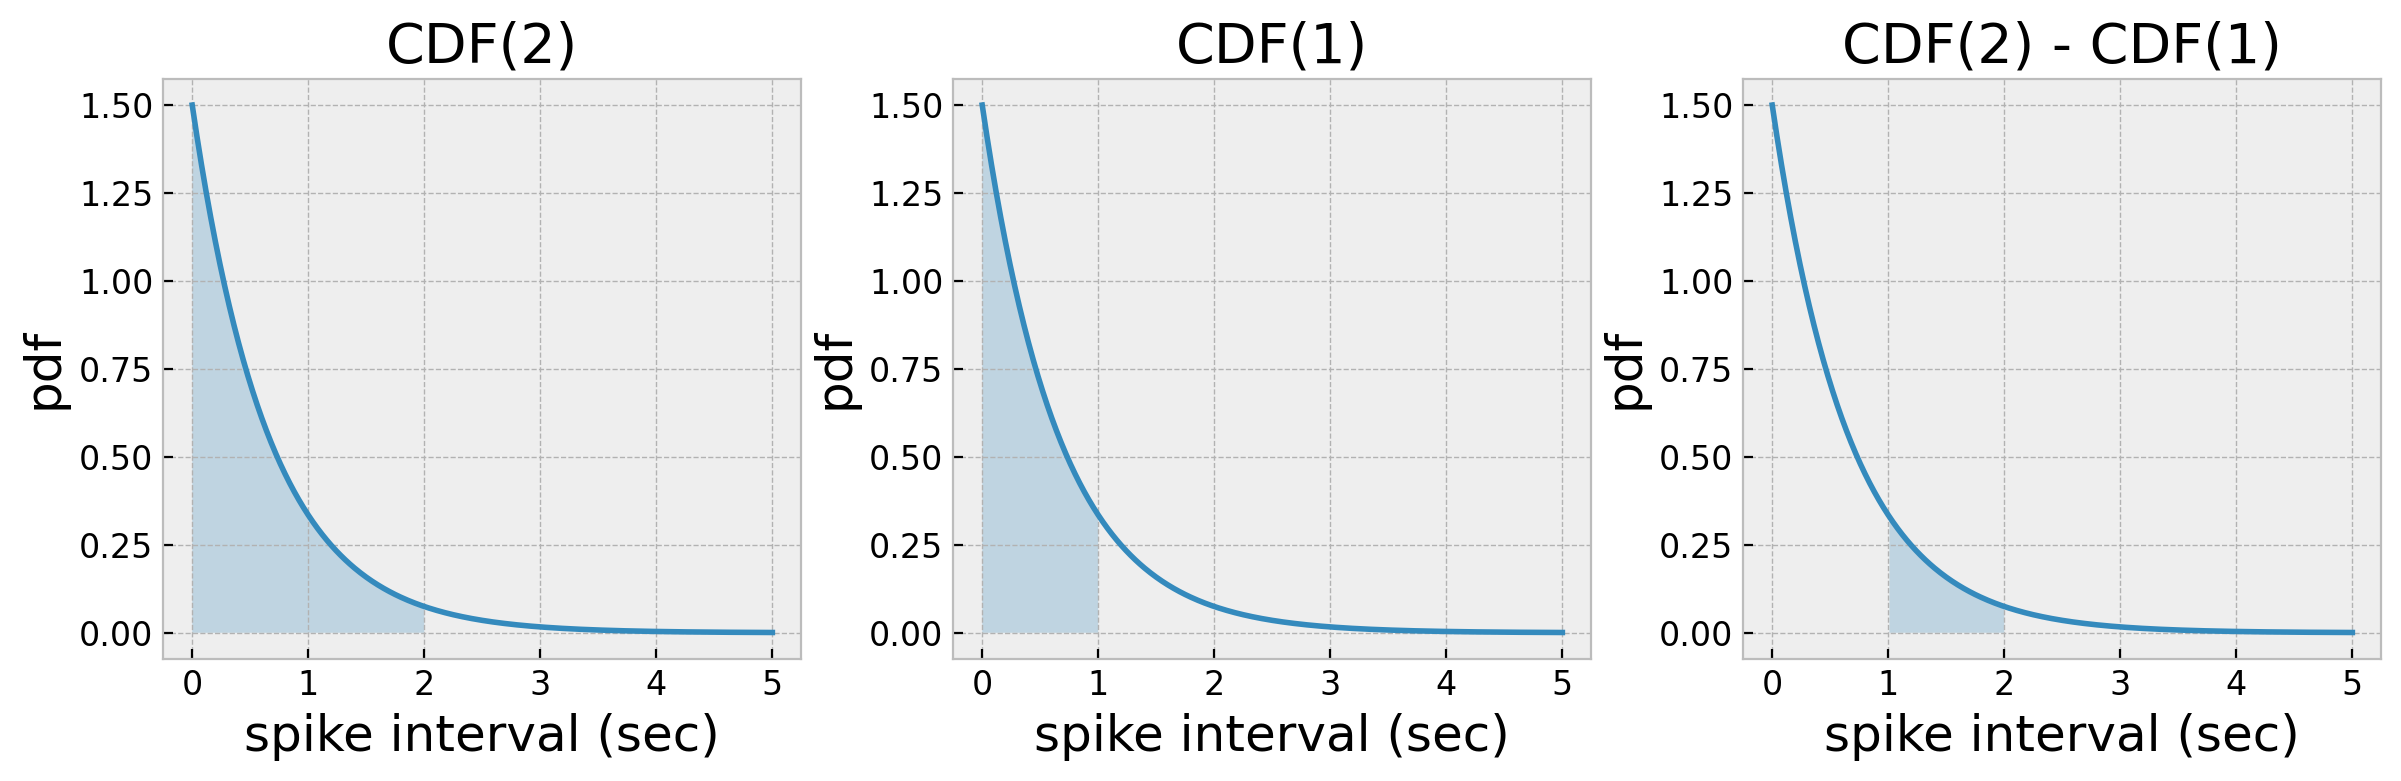

In [37]:
plt.figure(figsize=[12, 4])

plt.subplot(1, 3, 1)
plt.plot(intervals, pdf)
x = intervals[intervals <= 2]
plt.fill_between(x, np.zeros(x.shape), st.expon.pdf(x, 0, mu), alpha=0.25)
plt.xlabel('spike interval (sec)')
plt.ylabel('pdf')
plt.title('CDF(2)')

plt.subplot(1, 3, 2)
plt.plot(intervals, pdf)
x = intervals[intervals <= 1]
plt.fill_between(x, np.zeros(x.shape), st.expon.pdf(x, 0, mu), alpha=0.25)
plt.xlabel('spike interval (sec)')
plt.ylabel('pdf')
plt.title('CDF(1)')

plt.subplot(1, 3, 3)
plt.plot(intervals, pdf)
x = intervals[(intervals <= 2) & (intervals > 1)]
plt.fill_between(x, np.zeros(x.shape), st.expon.pdf(x, 0, mu), alpha=0.25)
plt.xlabel('spike interval (sec)')
plt.ylabel('pdf')
plt.title('CDF(2) - CDF(1)')

plt.tight_layout();

# Exercise

For the above example, what is the probability that at least 3 seconds will pass without any spikes?

In [38]:
# mean spike interval
mu = 1 / rate

# prob = ...

# print(f"There is a {prob * 100 :.2f}% chance that three seconds will pass without a spike.")

# Exercise Key

For the above example, what is the probability that at least 3 seconds will pass without any spikes?

In [39]:
# mean spike interval
mu = 1 / rate

prob = st.expon.sf(3, 0, mu)

print(f"There is a {prob * 100 :.2f}% chance that three seconds will pass without a spike.")

There is a 1.11% chance that three seconds will pass without a spike.


Imagine you recorded spike intervals from a neuron and your observed intervals are given below in the `data` variable.

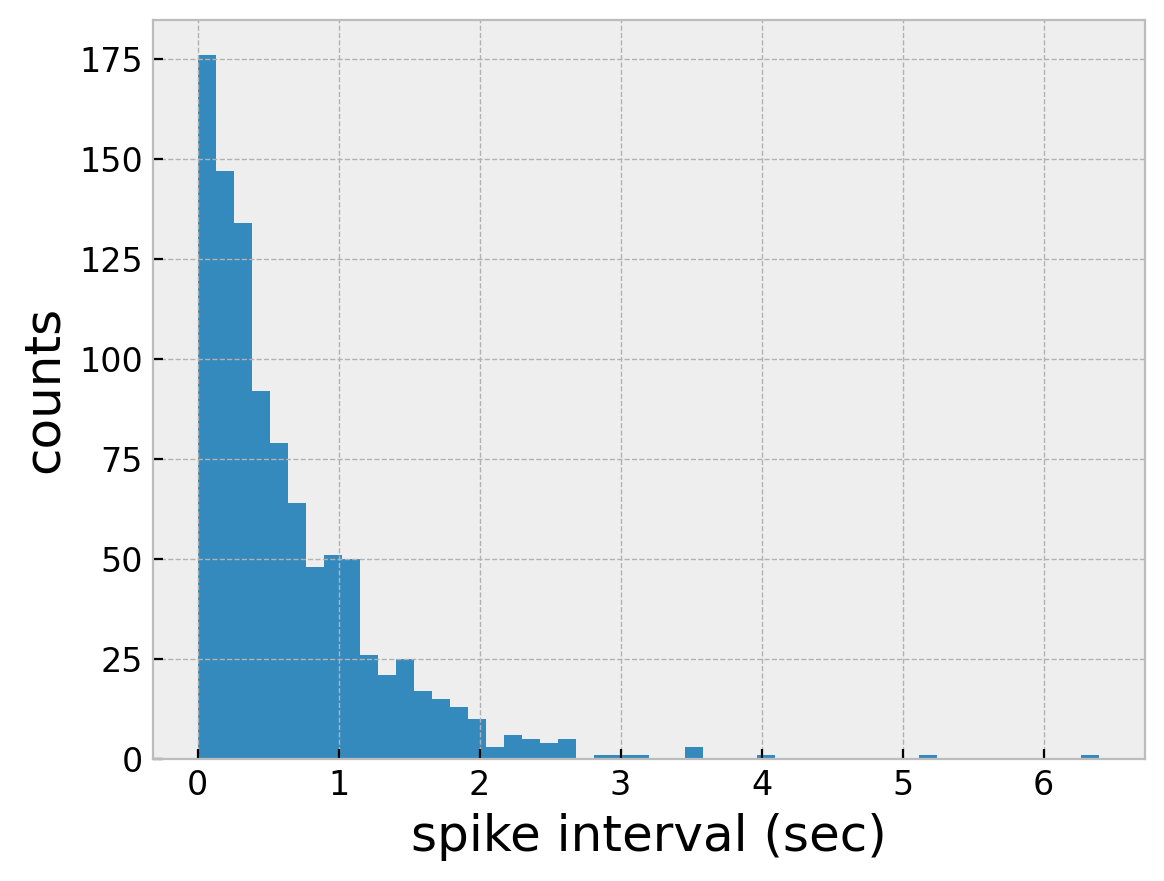

In [40]:
# simulated spike intervals
data = st.expon.rvs(0, mu, size=1000)

plt.hist(data, 50)  # <-- !!! Default histogram binning is not always the best.
plt.xlabel('spike interval (sec)')
plt.ylabel('counts');

Your best estimate for the *exponential distribution* that describes these data is defined by the *mean of the dataset*.

In [41]:
# estimated exponential distribution parameters from data
estimated_rate = 1 / data.mean()

estimated_pdf = st.expon.pdf(intervals, 0, data.mean())

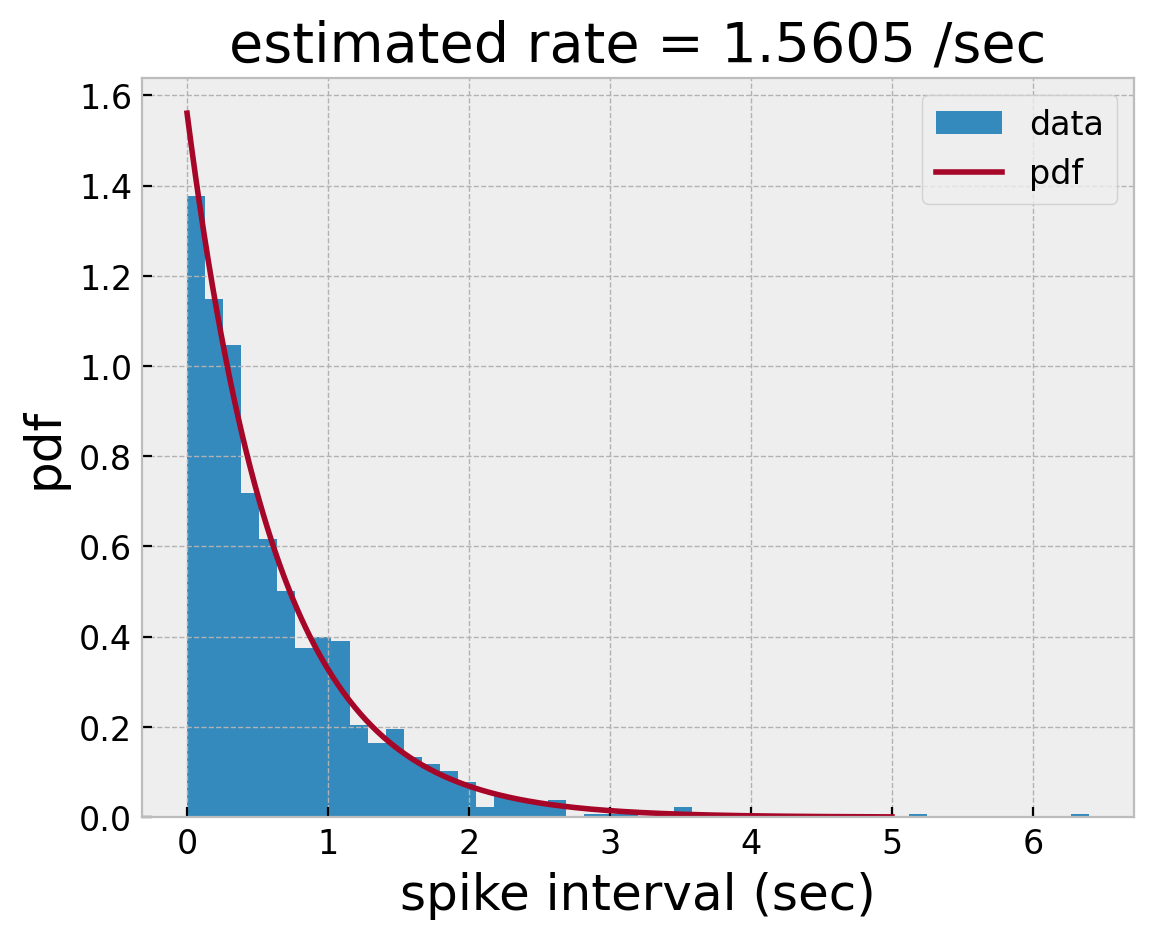

In [42]:
plt.hist(data, 50, label='data', density=True)
plt.plot(intervals, estimated_pdf, label='pdf')
plt.xlabel('spike interval (sec)')
plt.ylabel('pdf')
plt.title(f'estimated rate = {estimated_rate:.4f} /sec')
plt.legend();

Given the above data, within what interval do you expect 90% of spikes t occur?

Which `st.expon.?` function would you use to compute this?

In [43]:
st.expon.ppf(0.9, 0, data.mean())

1.4754996734615766

In [44]:
np.quantile(data, 0.9)

1.467240499073702

If you exclude both the fastest 2.5% and slowest 2.5%, between what times do you expect 95% of spike intervals to occur?

In [45]:
st.expon.ppf([0.025, 0.975], 0, data.mean())

array([0.01622369, 2.36383899])

In [46]:
np.quantile(data, [0.025, 0.975])

array([0.01783708, 2.25610384])

Consider measuring 300 samples (each sample includes measurements for $N = 100$ intervals).

In [47]:
# simulated samples of size N=100 intervals
N = 100
rand_samples = st.expon.rvs(0, mu, [N, 300])

Let's explore the distribution of sample means and the Central Limit Theorem.

In [48]:
# sample means
rand_sample_means = rand_samples.mean(axis=0)

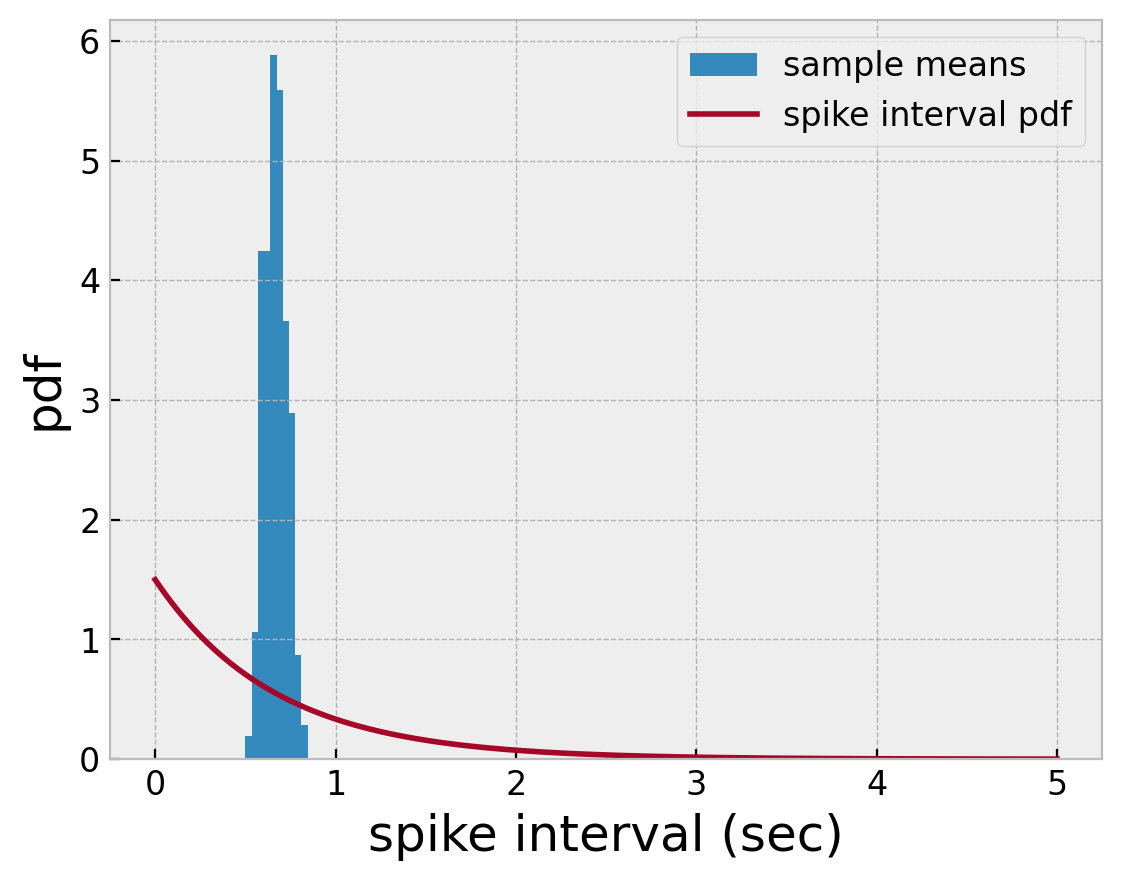

In [49]:
plt.hist(rand_sample_means, label='sample means', density=True)
plt.plot(intervals, pdf, label='spike interval pdf')
plt.xlabel('spike interval (sec)')
plt.ylabel('pdf')
plt.legend();

Even though the distribution is exponential, the distribution of sample means tends towards a normal distributuion by the Central Limit Theorem.

In [50]:
clt_pdf = st.norm.pdf(intervals, mu, data.std() / np.sqrt(N))

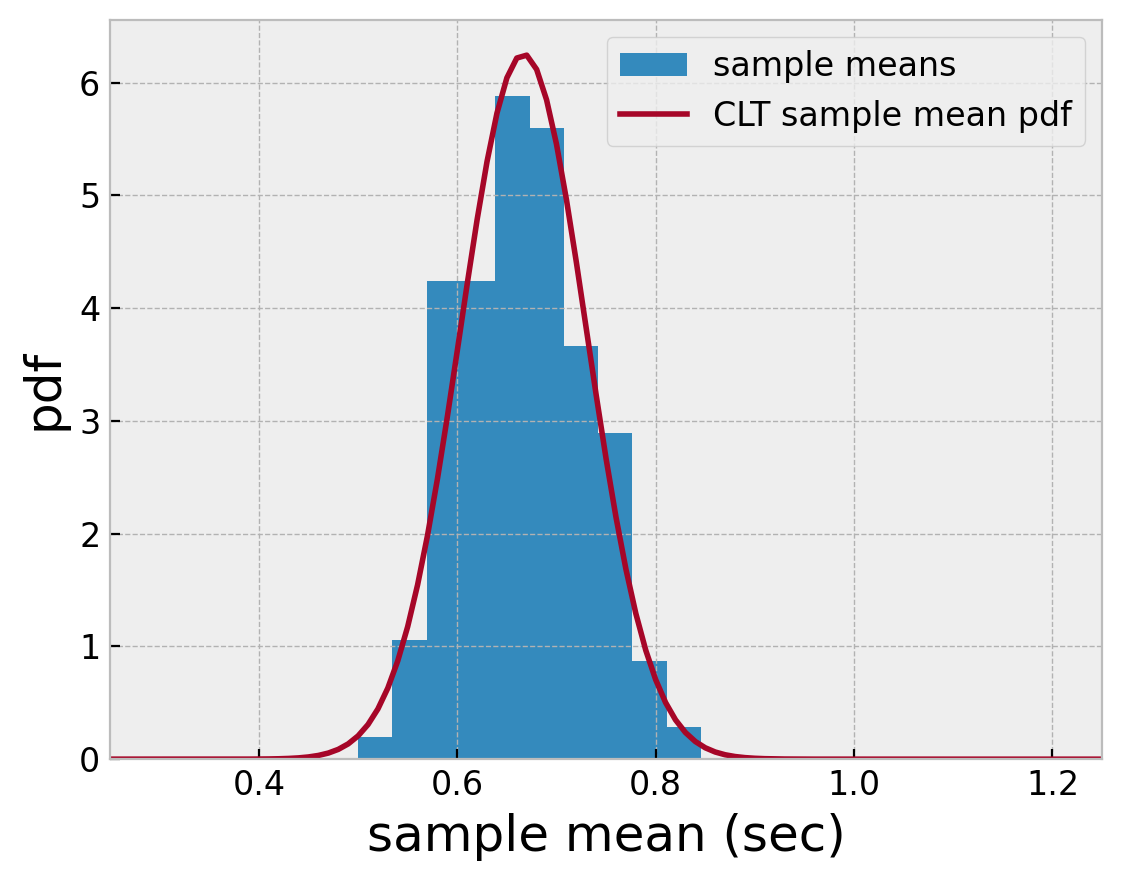

In [51]:
plt.hist(rand_sample_means, label='sample means', density=True)
plt.plot(intervals, clt_pdf, label='CLT sample mean pdf')
plt.xlim([0.25, 1.25])
plt.xlabel('sample mean (sec)')
plt.ylabel('pdf')
plt.legend();

### Learning goals - *Exponential distribution*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to use *scipy.stats* to work with *exponential distributions*.</div> | `st.expon` |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will understand that an *exponential distribution* is completely defined by its mean.</div> | rate = 1 / mean |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will appreciate that the *Central Limit Theorem* holds even for non-normal distributions.</div> | |

# Probability distributions of random variables

- Normal distribution
- Central Limit Theorem
- Exponential distribution
- *Poisson distribution*
- Binomial distribution

### Learning goals - *Exponential distribution*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to use *scipy.stats* to work with *poisson distributions*.</div> | `st.poisson` |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will understand that a *poisson distribution* is completely defined by its mean.</div> | rate = mean |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to plot a discrete probability distribution as a bar plot.</div> | |

### Example

Assume that the rate of deleterious mutations is ~1.2 per diploid genome (i.e., per individual). You want to know the probability that a given individual will have a certain number of mutations.

- In this case the **random variable** is the **number of deleterious mutations per individual**.
- You could model this variable using a **poisson distribution** because the data represent discrete numbers of mutations per individual with mutations occuring at an average rate.

Poisson distribution

- rate $\lambda$ = 1.2 mutations per individual

In [52]:
rate = 1.2  # average rate of deleterious mutations per diploid genome

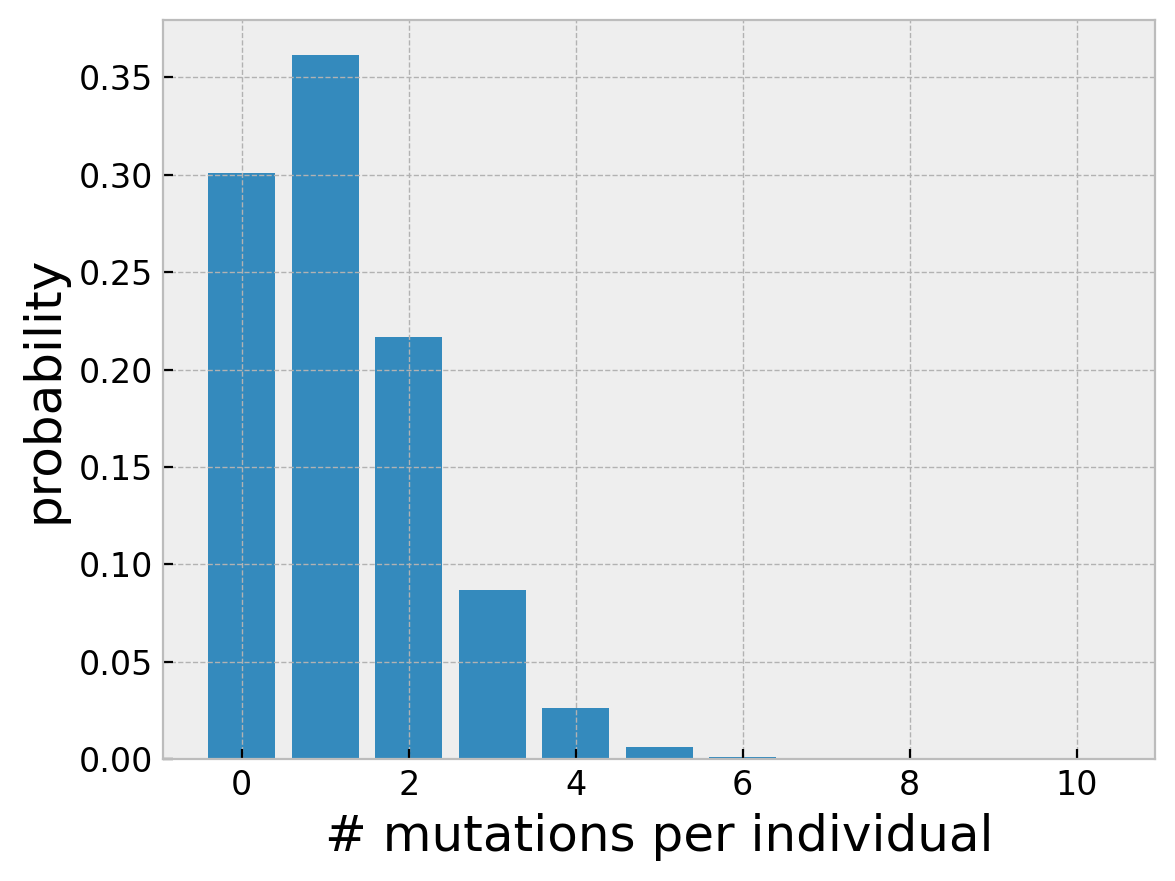

In [53]:
# let's look at the probability for 0-10 mutations
n_mutations = np.arange(11)

# probability (mass function) for each number of mutations from 0-10
pmf = st.poisson.pmf(n_mutations, rate)

plt.bar(n_mutations, pmf)
plt.xlabel('# mutations per individual')
plt.ylabel('probability');

What is the probability that an individual has 4 or more spontaneous deleterious mutations?

What `st.poisson.?` function would you use?

In [54]:
print(f"Probability of less than 4 mutations = {st.poisson.cdf(3, rate)}")
print(f"Probability of 4 or more mutations = {st.poisson.sf(3, rate)}")

Probability of less than 4 mutations = 0.9662310318143443
Probability of 4 or more mutations = 0.03376896818565569


Consider measuring the number of deleterious mutations in 1000 individuals (see `data` below).

In [55]:
# simulated numbers of mutations from subjects
data = st.poisson.rvs(rate, size=1000)

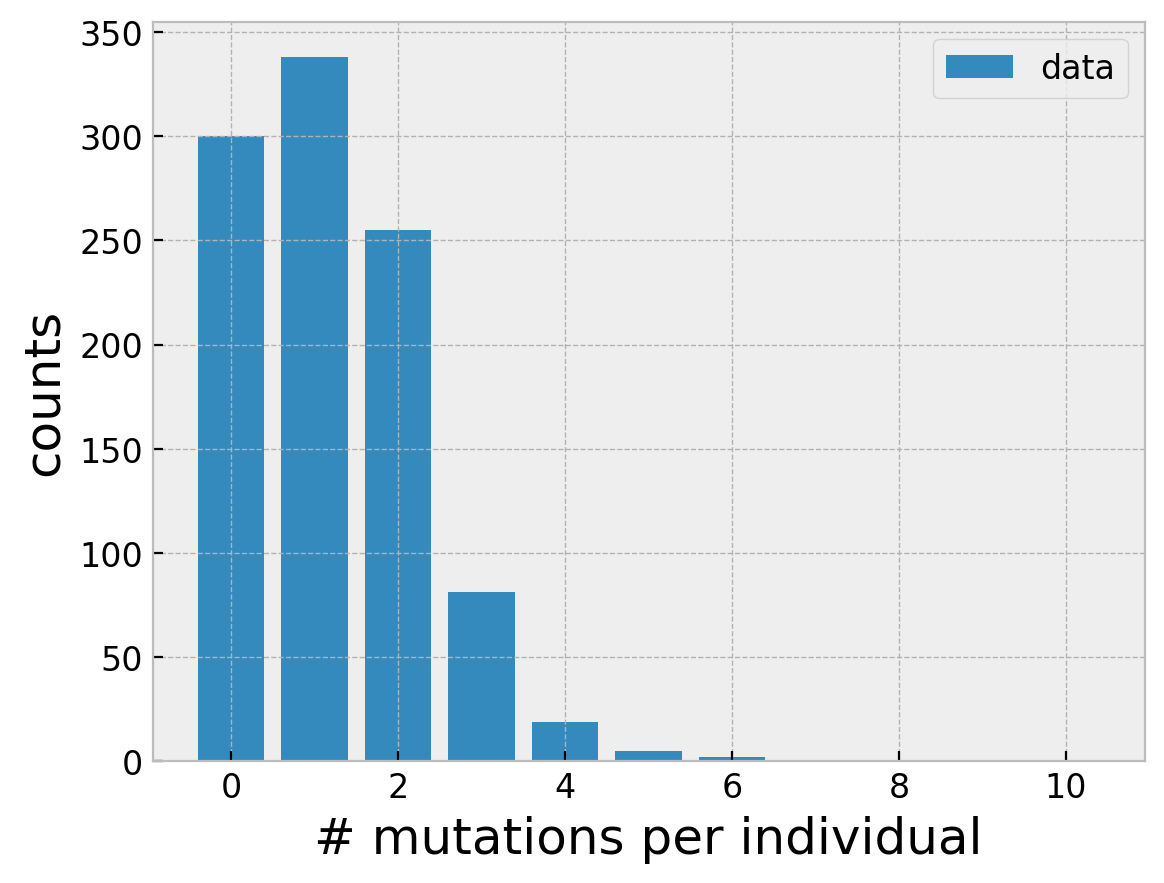

In [56]:
bin_edges = np.arange(12) - 0.5  # bin centers = 0 ... 10
bin_centers = bin_edges[:-1] + 0.5  # 0 ... 10

counts, bin_edges = np.histogram(data, bin_edges)

plt.bar(bin_centers, counts, label='data')
plt.xlabel('# mutations per individual')
plt.ylabel('counts')
plt.legend();

Your best estimate of the average mutation rate is just the mean number of mutations per individual.

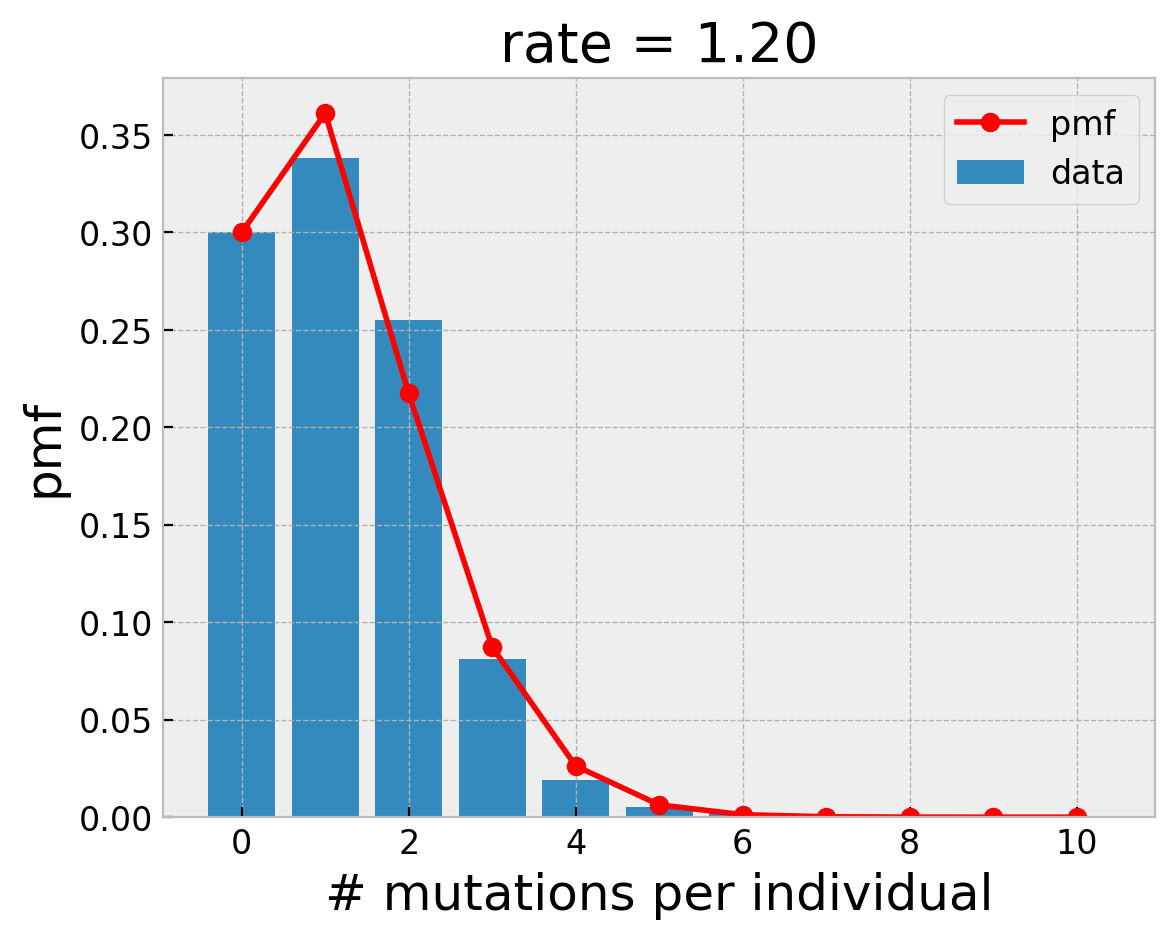

In [57]:
estimated_rate = data.mean()

estimated_pmf = st.poisson.pmf(bin_centers, estimated_rate)

plt.bar(bin_centers, counts / len(data), label='data')
plt.plot(bin_centers, estimated_pmf, 'o-', c='r', label='pmf')
plt.xlabel('# mutations per individual')
plt.ylabel('pmf')
plt.title(f'rate = {estimated_rate:.2f}')
plt.legend();

### Learning goals - *Exponential distribution*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to use *scipy.stats* to work with *poisson distributions*.</div> | `st.poisson` |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will understand that a *poisson distribution* is completely defined by its mean.</div> | $rate = mean$ |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to plot a discrete probability distribution as a bar plot.</div> | |

# Probability distributions of random variables

- Normal distribution
- Central Limit Theorem
- Exponential distribution
- Poisson distribution
- *Binomial distribution*

### Example

A couple, who are both carriers for a recessive disease, wish to have 5 children. They want to know the probability that they will have at least four healthy children.

- In this case the **random variable** is the **whether or not a child has the disease**.
- You could model this variable using a **binomial distribution** because it represents a true/false (yes/no) condition repeated independently over multiple children.

Binomial distribution
- number of trials (children): $n = 5$
- probability that each child is healthy: $p = 1 - 0.5 * 0.5 = 0.75$

In [58]:
n = 5  # total number of children
p = 0.75  # probability that each child is healthy = 1 - 0.5 * 0.5 = 0.75

What is the probability that exactly 4 of the 5 children will be healthy?

In [59]:
st.binom.pmf(4, n, p)

0.39550781250000006

What is the probability of each possible number of healthy children?

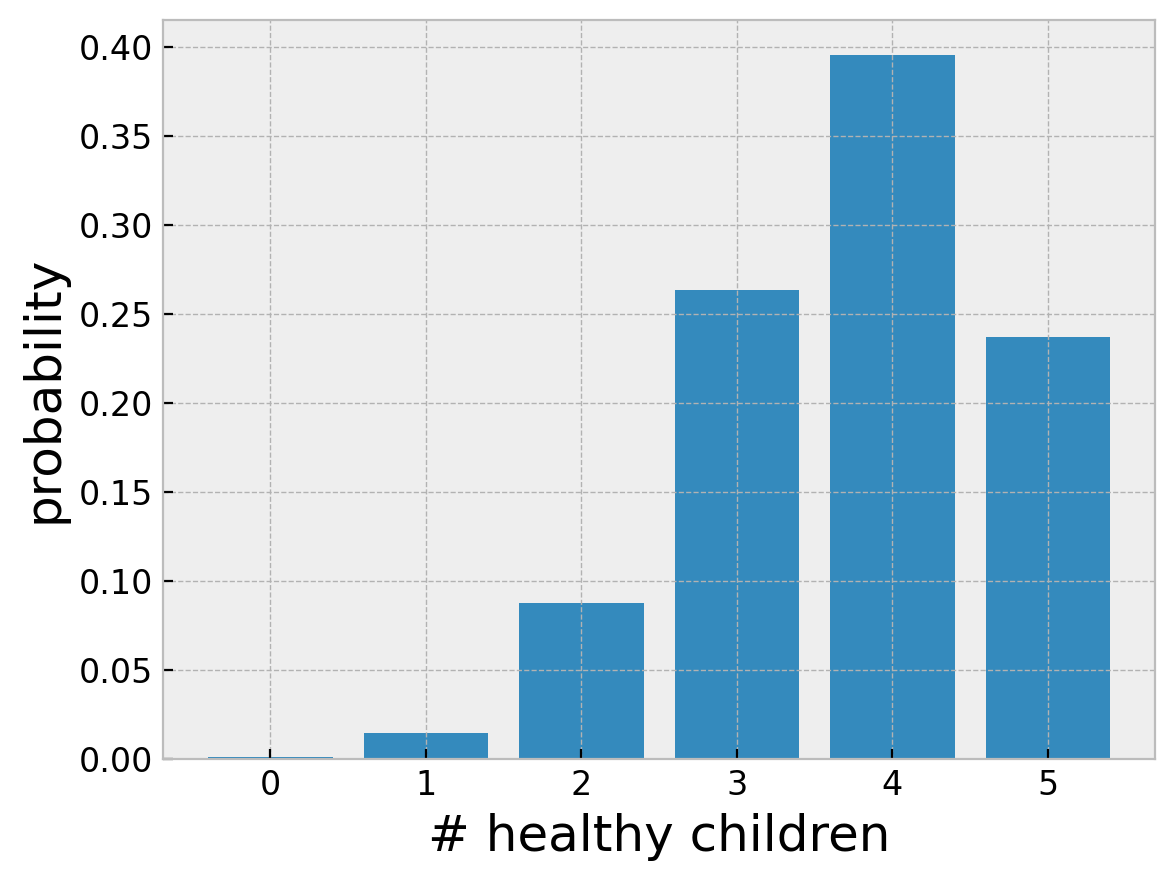

In [60]:
n_children = np.arange(6)

pmf = st.binom.pmf(n_children, n, p)

plt.bar(n_children, pmf)
plt.xlabel('# healthy children')
plt.ylabel('probability');

What is the probability that at least 4 children will be healthy?

In [61]:
st.binom.sf(3, n, p)

0.6328125

In [62]:
1 - st.binom.cdf(3, n, p)

0.6328125

In [63]:
pmf[4:].sum()

0.6328125

What is the mean expected number of healthy children?

$\mu = \sum{X * P(X)}$

In [64]:
mu = (n_children * pmf).sum()
mu

3.75

The probability $p$ in a *binomial distribution* can be derived from the number of trials $n$ and the distribution *mean*.

In [65]:
mu / n

0.75

In [66]:
mu / n == p

True

Imagine you collected data from 50 couples with 5 children each, where each couple were all carriers for this recessive disease.

You store the number of healthy children without the disease (out of 5 children total) for each couple in the `data` variable below.

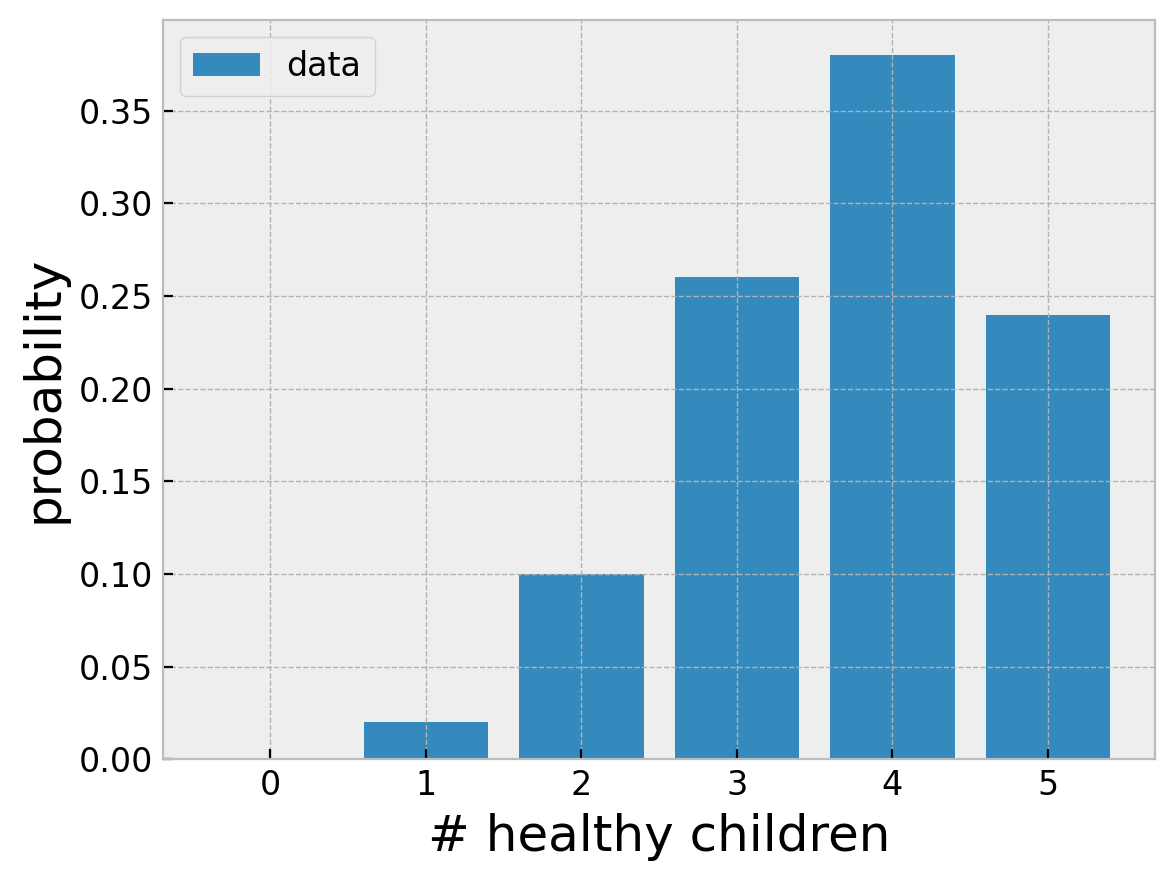

In [67]:
n = 5
p = 0.75

# simulated numbers of healthy children (out of 5) from sampled couples who are carriers
data = st.binom.rvs(n, p, size=50)

bin_edges = np.arange(n+2) - 0.5
counts, bin_edges = np.histogram(data, bin_edges)

n_children = np.arange(n+1)
plt.bar(n_children, counts / len(data), label='data')
plt.xlabel('# healthy children')
plt.ylabel('probability')
plt.legend();

From the data, what is your best estimate for the probability that a given child will be healthy?

In [68]:
estimated_p = data.mean() / n
estimated_p

0.744

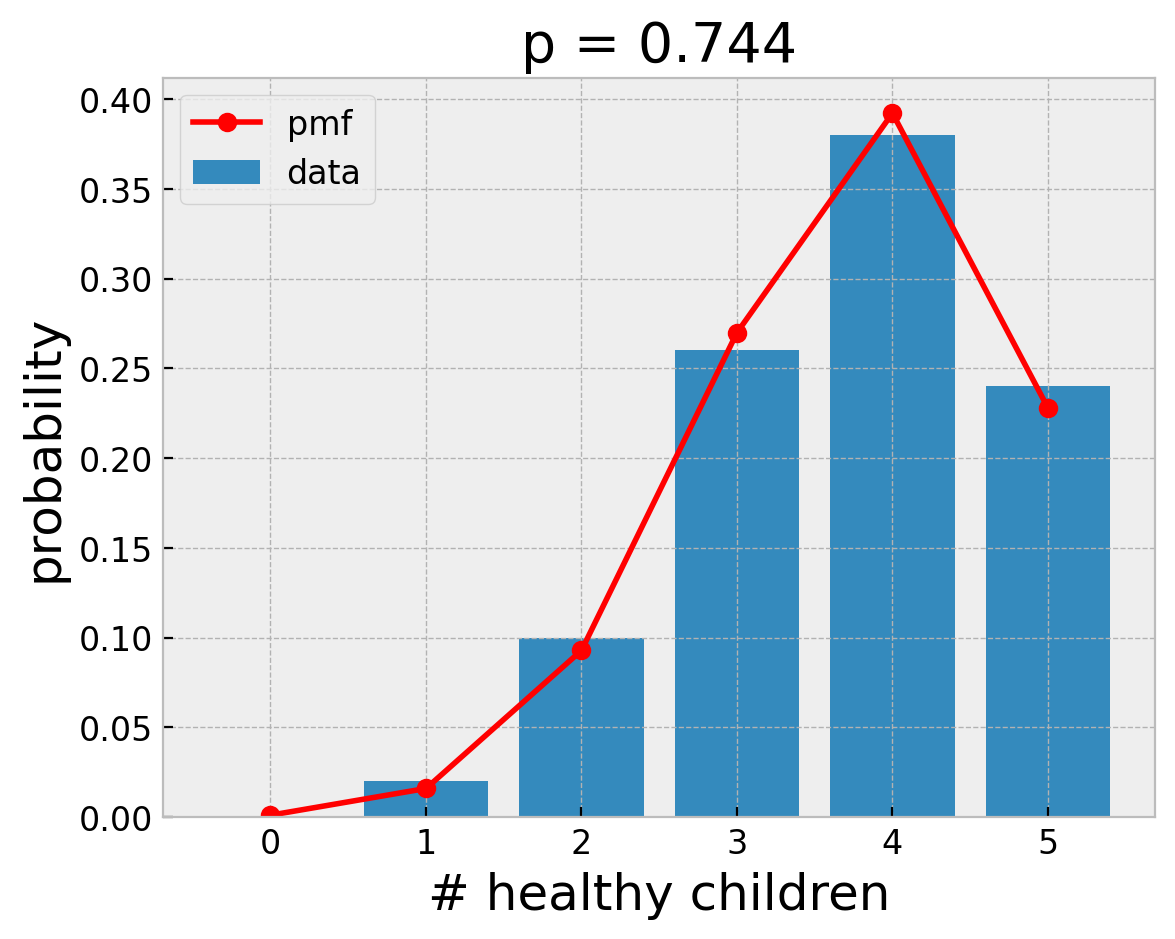

In [69]:
estimated_pmf = st.binom.pmf(n_children, n, estimated_p)

plt.bar(n_children, counts / len(data), label='data')
plt.plot(n_children, estimated_pmf, 'o-', c='r', label='pmf')
plt.xlabel('# healthy children')
plt.ylabel('probability')
plt.title(f'p = {estimated_p :.3f}')
plt.legend();